In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import sieve

In [9]:
cities = pd.read_csv('cities.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [10]:
len(sample_submission)

197770

In [11]:
def is_prime(n):
    """Determines if a positive integer is prime."""

    if n > 2:
        i = 2
        while i ** 2 <= n:
            if n % i:
                i += 1
            else:
                return False
    elif n != 2:
        return False
    return True

In [12]:
cities['is_prime'] = cities.CityId.apply(is_prime)

In [13]:
cities.is_prime.sum()

17802

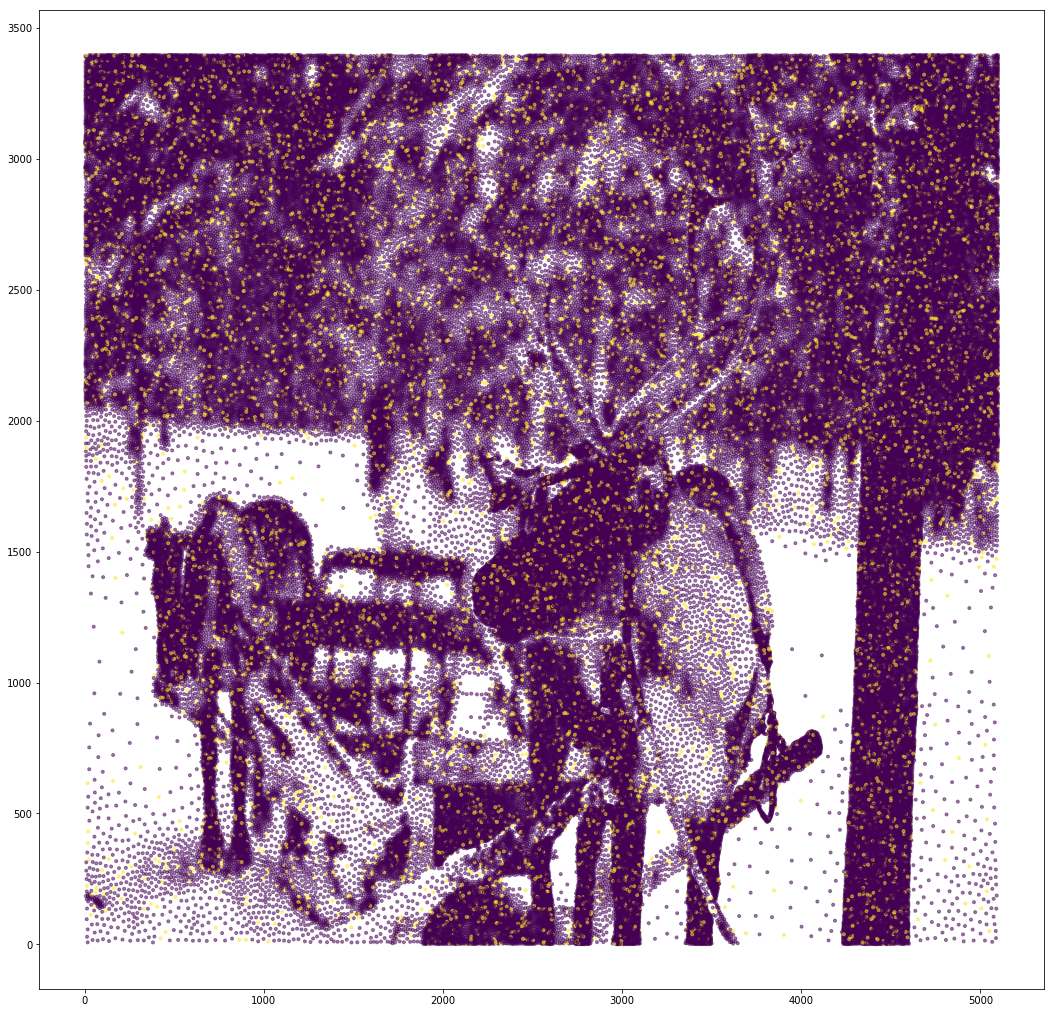

In [14]:
fig = plt.figure(figsize=(18,18))
plt.scatter(cities.X, cities.Y, c=cities['is_prime'], marker=".", alpha=.5);

In [15]:
def dist_func(df, local):
    for i in range(1, len(df)):
        dist = math.hypot(df.iloc[i, 1] - df.iloc[local, 1], 
                          df.iloc[i, 2] - df.iloc[local, 2])
        return dist

In [16]:
def dist_from_np(row):
    dist = math.hypot(row.loc['X'] - cities.iloc[0, 1], 
                      row.loc['Y'] - cities.iloc[0, 2])
    return(dist)

In [17]:
cities['0_dist'] = cities.apply(dist_from_np, axis = 1)

In [25]:
cities = cities.sort_values('0_dist').reset_index().drop('index', axis = 1)

In [52]:
non_prime_cities = cities.loc[cities.is_prime == False]['CityId'].reset_index().drop('index', axis = 1)
prime_cities = cities.loc[cities.is_prime == True]['CityId'].reset_index().drop('index', axis = 1)

In [130]:
city_path = []
non_prime_counter = 0
prime_counter = 0
for i in range(1, len(cities)+1):
    if (i - 1) % 10 == 0 and prime_counter < len(prime_cities) and i != 1:
        city_path.append(prime_cities.iloc[prime_counter][0])
        prime_counter += 1
    else:
        city_path.append(non_prime_cities.iloc[non_prime_counter][0])
        non_prime_counter += 1

In [133]:
submission_df = pd.DataFrame({'Path':city_path})

In [134]:
submission_df = pd.concat([submission_df, pd.DataFrame({'Path':0}, index=[0])])

In [135]:
submission_df.to_csv('2nd_submission.csv', index=False)

In [136]:
len(submission_df)

197770

In [138]:
cities.loc[cities.CityId == 111804]

,CityId,X,Y,is_prime,0_dist
9,111804,314.494243,2186.646748,False,15.867818


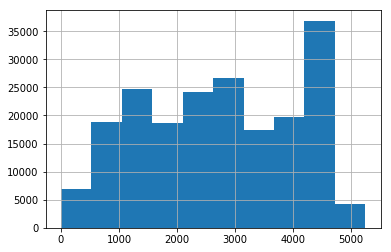

In [141]:
cities['0_dist'].hist()

In [142]:
import random

In [155]:
len(random.sample(range(1, len(cities)+1), len(cities)))

197769

In [157]:
cities['random'] = random.sample(range(1, len(cities)+1), len(cities))

In [165]:
cities.iloc[0,5] = 0

In [173]:
city_lst = list(cities.sort_values('random')['CityId'])

In [174]:
city_lst.append(0)

In [177]:
submission_df = pd.DataFrame({'Path':city_lst})

In [178]:
submission_df.to_csv('3rd_submission.csv', index=False)